In [135]:
#importing libraries
import pandas as pd
import warnings
from sklearn.metrics import mean_absolute_error
import numpy as np
%matplotlib inline

In [136]:
warnings.filterwarnings('ignore')

In [137]:
#Loading the dataset
df_milk = pd.read_csv("Data/monthly_milk_production.csv",parse_dates=True,index_col=['Date'])


In [138]:
#Looking into head of dataset
df_milk.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


Text(0, 0.5, 'Milk Production')

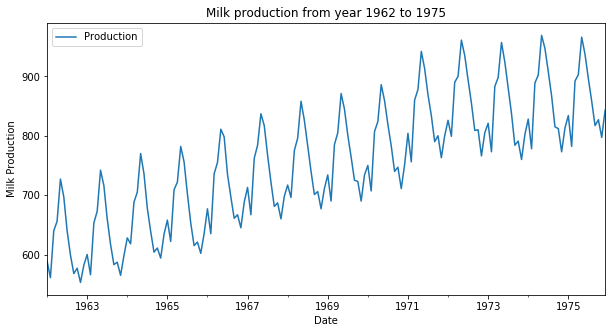

In [139]:
#Plotting graph to check the characteristics
ax = df_milk.plot(figsize=(10,5))
ax.set_title("Milk production from year 1962 to 1975")
ax.set_ylabel("Milk Production")

#Checking start and end date of dataset
df_milk.index

We have Monthly dataset from year 1962 t0 1974 , Now lets use Benchmark methods to forecast for year 1975.

In [140]:
df_milk.index

DatetimeIndex(['1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01',
               ...
               '1975-03-01', '1975-04-01', '1975-05-01', '1975-06-01',
               '1975-07-01', '1975-08-01', '1975-09-01', '1975-10-01',
               '1975-11-01', '1975-12-01'],
              dtype='datetime64[ns]', name='Date', length=168, freq=None)

Mean Method : In Mean method , All the forecast values are equal to Mean of the entire dataset.


In [141]:
#To find mean of the dataset , We have a function called df.mean() in pandas
train = df_milk.loc['1962-01-01':'1974-12-01']
test =  df_milk.loc['1975-01-01':] 

In [142]:
#Getting the predictions for the year 1975
pred_mean =  test.copy()
for i in pred_mean.index:
    pred_mean.loc[i] = df_milk.mean()


In [143]:
#Predictions using Mean method
pred_mean

,Production
Date,
1975-01-01,754.708333
1975-02-01,754.708333
1975-03-01,754.708333
1975-04-01,754.708333
1975-05-01,754.708333
1975-06-01,754.708333
1975-07-01,754.708333
1975-08-01,754.708333
1975-09-01,754.708333


Text(0, 0.5, 'Milk Production')

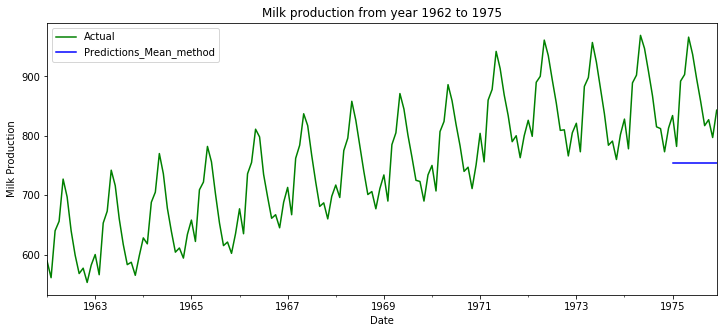

In [144]:
ax = df_milk['Production'].plot(figsize=(12,5),color='green',legend=True,label='Actual')
pred_mean['Production'].plot(color='blue',legend=True,label='Predictions_Mean_method')
ax.set_title("Milk production from year 1962 to 1975")
ax.set_ylabel("Milk Production")

In [145]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [146]:
print("MAPE for Mean method  " +str(mean_absolute_percentage_error(test,pred_mean)))

MAPE for Mean method  12.174345672288299


In [147]:
print("MAE for Mean method " +str(mean_absolute_error(test,pred_mean)))

MAE for Mean method 107.95833333333326


Now Lets check Naive Method!
Naive Method puts all forecasts to most recent value

In [148]:
train = df_milk.loc['1962-01-01':'1974-12-01']
test =  df_milk.loc['1975-01-01':] 

In [149]:
#Forecasting using Naive method . Getting the predictions for the year 1975
pred_naive =  test.copy()
for i in pred_naive.index:
    pred_naive.loc[i] = train.tail(1).iloc[0]  #Just putting last value of train data

In [150]:
#Predictions using naive method
pred_naive

,Production
Date,
1975-01-01,813
1975-02-01,813
1975-03-01,813
1975-04-01,813
1975-05-01,813
1975-06-01,813
1975-07-01,813
1975-08-01,813
1975-09-01,813


Text(0, 0.5, 'Milk Production')

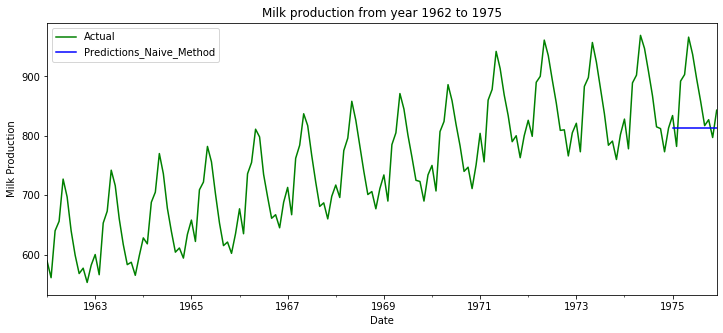

In [151]:
ax = df_milk['Production'].plot(figsize=(12,5),color='green',legend=True,label='Actual')
pred_naive['Production'].plot(color='blue',legend=True,label='Predictions_Naive_Method')
ax.set_title("Milk production from year 1962 to 1975")
ax.set_ylabel("Milk Production")

In [152]:
print("MAPE for Naive method  " +str(mean_absolute_percentage_error(test,pred_naive)))

MAPE for Naive method  6.386212555229482


In [153]:
print("MAE for Naive method " +str(mean_absolute_error(test,pred_naive)))

MAE for Naive method 57.5


Now lets try Seasonal Naive Method
In this method the forecast values  equal to the last observed value from the same season of the year ( same month ,same day of previous year etc). For this example since its a monthly data I  will be forecasting using last observed value of same month in previous year.

In [154]:
#Getting last year values from train data.
last_year = train.loc['1974-01-01':"1974-12-01"]

    

In [155]:
pred_seasonal_naive =  test.copy()
for i in  range(0,len(pred_naive)):
    pred_seasonal_naive.iloc[i] = last_year.iloc[i]

In [156]:
#Predictions using seasonal naive method
pred_seasonal_naive

,Production
Date,
1975-01-01,828
1975-02-01,778
1975-03-01,889
1975-04-01,902
1975-05-01,969
1975-06-01,947
1975-07-01,908
1975-08-01,867
1975-09-01,815


Text(0, 0.5, 'Milk Production')

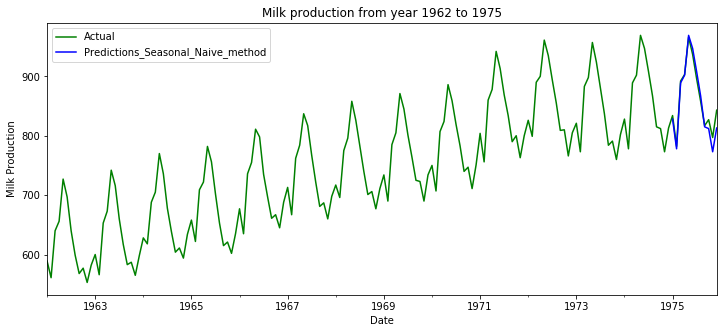

In [157]:
ax = df_milk['Production'].plot(figsize=(12,5),color='green',legend=True,label='Actual')
pred_seasonal_naive['Production'].plot(color='blue',legend=True,label='Predictions_Seasonal_Naive_method')
ax.set_title("Milk production from year 1962 to 1975")
ax.set_ylabel("Milk Production")

In [158]:
print("MAPE for Seasonal Naive method  " +str(mean_absolute_percentage_error(test,pred_seasonal_naive)))

MAPE for Seasonal Naive method  1.1727186579087991


In [159]:
print("MAE for Seasonal Naive method " +str(mean_absolute_error(test,pred_seasonal_naive)))

MAE for Seasonal Naive method 9.916666666666666


Now lets check Drift Method , Drift Method simply " drawing a line between the first and last observations, and extrapolating it into the future"

In [160]:
pred_drift =  test.copy()
first_observation = train.head(1).iloc[0]
last_observation = train.tail(1).iloc[0]
length_time = len(train)
h = 1 # Forecast horizon
for i in  range(0,len(pred_drift)):
    pred_drift.iloc[i] = last_observation + h *((last_observation-first_observation)/length_time)
    last_observation = pred_drift.iloc[i]
    h = h+1
    length_time =length_time+1

In [161]:
#Predictions using drift method
pred_drift

,Production
Date,
1975-01-01,814.435897
1975-02-01,817.307692
1975-03-01,821.642648
1975-04-01,827.495294
1975-05-01,834.948272
1975-06-01,844.114046
1975-07-01,855.137492
1975-08-01,868.199455
1975-09-01,883.521376


Text(0, 0.5, 'Milk Production')

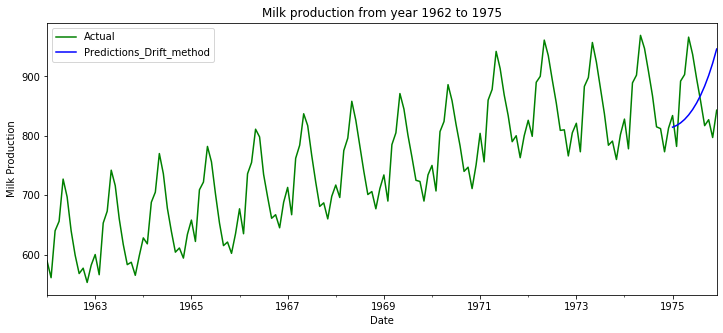

In [162]:
#Plotting the Trend
ax = df_milk['Production'].plot(figsize=(12,5),color='green',legend=True,label='Actual')
pred_drift['Production'].plot(color='blue',legend=True,label='Predictions_Drift_method')
ax.set_title("Milk production from year 1962 to 1975")
ax.set_ylabel("Milk Production")

In [163]:
print("MAPE for Mean method  " +str(mean_absolute_percentage_error(test,pred_drift)))

MAPE for Mean method  8.115436825467894


In [164]:
print("MAE for Naive method " +str(mean_absolute_error(test,pred_drift)))

MAE for Naive method 70.39167811799493


Text(0, 0.5, 'Milk Production')

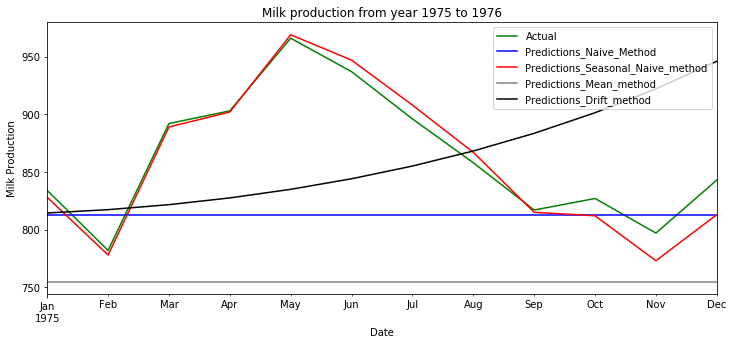

In [165]:
#Plotting the Trend
ax = df_milk['Production']['1975-01-01':].plot(figsize=(12,5),color='green',legend=True,label='Actual')
pred_naive['Production'].plot(color='blue',legend=True,label='Predictions_Naive_Method')
pred_seasonal_naive['Production'].plot(color='red',legend=True,label='Predictions_Seasonal_Naive_method')
pred_mean['Production'].plot(color='gray',legend=True,label='Predictions_Mean_method')
pred_drift['Production'].plot(color='black',legend=True,label='Predictions_Drift_method')
ax.set_title("Milk production from year 1975 to 1976")
ax.set_ylabel("Milk Production")



Happy Learning!